In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
sales=pd.read_csv("Advertising.csv")
print(sales.head())


   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


The 'Unnamed: 0' column has no use to us. So we drop it

In [3]:
sales.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [4]:
print(sales.describe())


               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [5]:
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [6]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Here 'Sales' is the dependent variable. 'TV', 'Radio', 'Newspaper' are the independent variables. 'Sales' column cannot be split into categorical classes. It can have any float value. So we use multiple linear regression for the model.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

In [8]:
X=sales[["TV", "Radio", "Newspaper"]]
y=sales["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
predictions=model.predict(X_test)
score = model.score(X_test,y_test)
print(score)
print("MAE: ",mean_absolute_error(y_test,predictions))
print("MSE: ",mean_squared_error(y_test,predictions))
print("RMSE: ",np.sqrt(mean_absolute_error(y_test,predictions)))

0.8649018906637791
MAE:  1.233375952285021
MSE:  3.691394845698609
RMSE:  1.1105746045561373


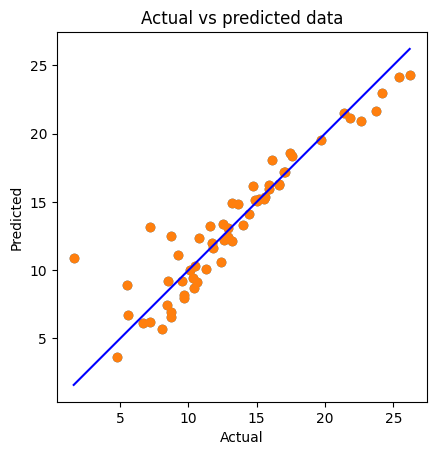

In [11]:
plt.scatter(y_test,predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs predicted data")
p1=max(max(predictions),max(y_test))
p2=min(min(predictions),min(y_test))
plt.scatter(y_test,predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs predicted data")
plt.plot([p1,p2],[p1,p2],'b-')
plt.axis('square')
plt.show()

We try decision tree regression

In [12]:
from sklearn.tree import DecisionTreeRegressor

regressor= DecisionTreeRegressor(random_state=0,max_depth=10)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [13]:
regpred=regressor.predict(X_test)
treeScore=regressor.score(X_test,y_test)
print(treeScore)
print("MAE: ",mean_absolute_error(y_test,regpred))
print("MSE: ",mean_squared_error(y_test,regpred))
print("RMSE: ",np.sqrt(mean_absolute_error(y_test,regpred)))

0.914092014381841
MAE:  1.0366666666666666
MSE:  2.3473333333333333
RMSE:  1.0181682899534177


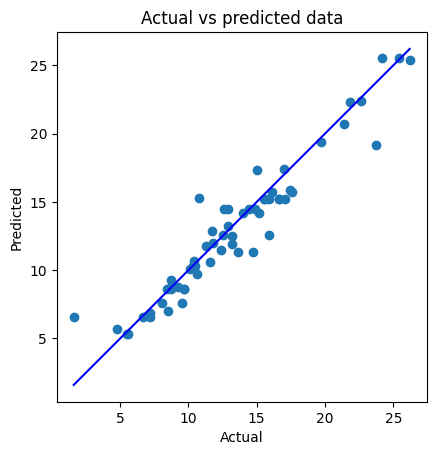

In [14]:
p1=max(max(regpred),max(y_test))
p2=min(min(regpred),min(y_test))
plt.scatter(y_test,regpred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs predicted data")
plt.plot([p1,p2],[p1,p2],'b-')
plt.axis('square')
plt.show()